<a href="https://colab.research.google.com/github/casualcomputer/AgPal/blob/main/AgPal_optimize_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup (Python libraries)

## Set "requirements.txt"

In [1]:
%%writefile requirements.txt
beautifulsoup4==4.11.1
gensim==4.2.0
nltk==3.7
numpy==1.21.5
pandas==1.4.4
scipy==1.9.1
tqdm==4.64.1
seaborn==0.12.1
sentence-transformers==2.2.2
faiss-gpu==1.7.2
sentence-transformers==2.2.2
faiss-gpu==1.7.2

Writing requirements.txt


## Install packages

In [2]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 128 kB 16.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24.1 MB 1.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15.7 MB 24 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11.7 MB 9.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 43.4 MB 1.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 288 kB 46.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 85 kB 2.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

# Get dataset

## Get data dump with API

In [3]:
import requests
import pandas as pd
path ="http://api.agpaldataservice.ca/AgPalDataAPI/api/v2/query?format=xml&type=file"
data = pd.read_xml(path)
data.desc = data.desc.fillna('None')
data.head()

docType                                           title            id  \
0  program                                   AgriInsurance   AAFC-004-en   
1  program  Canadian Agricultural Loans Act (CALA) Program   AAFC-006-en   
2  program              Farm Debt Mediation Service (FDMS)   AAFC-008-en   
3  program                       Managing Agroclimate Risk  AAFC-0161-en   
4  program                            Watershed Protection  AAFC-0164-en   

                                                 url authority programOwner  \
0  <a target="_blank" href="https://agriculture.c...   Federal         AAFC   
1  <a target="_blank" href="https://agriculture.c...   Federal         AAFC   
2  <a target="_blank" href="https://agriculture.c...   Federal         AAFC   
3  <a target="_blank" href="https://agriculture.c...   Federal         AAFC   
4  <a target="_blank" href="https://agriculture.c...   Federal         AAFC   

                                           shortDesc  \
0  <p>AgriInsurance is a federal-provincial-produ...   
1  <p>The¬†Canadian Agricultural Loans Act¬†(CALA) ...   
2  <p>The Farm Debt Mediation Service offers fina...   
3  <p>The information here on farm management pra...   
4  <p>Provides information on the basics of water...   

                                                desc  \
0  <p>AgriInsurance is a federal-provincial-produ...   
1  <p>The CALA program builds on and replaces the...   
2  <p>The Farm Debt Mediation Service offers fina...   
3                                               None   
4                                               None   

                   policyFramework           category        region  \
0  CanadianAgriculturalPartnership            Service  AcrossCanada   
1                    NotApplicable            Program  AcrossCanada   
2                    NotApplicable            Service  AcrossCanada   
3                    NotApplicable  GuidesInformation  AcrossCanada   
4                    NotApplicable  GuidesInformation  AcrossCanada   

                          topic                     service       commodity  \
0          InsuranceRecoveryAid        InsuranceRecoveryAid  BeesApiculture   
1  EquipmentMachineryProcessing  FinancialSupportIncentives     Nonspecific   
2       ExpertiseAdviceGuidance     ExpertiseAdviceGuidance     Nonspecific   
3     LandPurchaseLeasingAccess          LandInfrastructure       Livestock   
4       ExpertiseAdviceGuidance          LandInfrastructure     Nonspecific   

                        clientType programStatus createdDate modifiedDate  \
0             FarmersFoodProducers          open  2012-01-27   2021-10-08   
1          YoungFarmersNewEntrants          open  2012-01-27   2021-10-08   
2             FarmersFoodProducers          open  2012-01-27   2021-10-08   
3  NonprofitCommunityOrganizations          open  2018-02-06   2020-04-15   
4  NonprofitCommunityOrganizations          open  2018-02-09   2021-01-15   

  publishedDate  
0    2021-10-08  
1    2021-10-08  
2    2021-10-08  
3    2020-04-15  
4    2021-01-15

## Extract url

In [4]:
from bs4 import BeautifulSoup

extracted_url = []

# The HTML string to be cleaned
for html_string in data.url:

  # Create a BeautifulSoup object
  soup = BeautifulSoup(html_string, 'html.parser')

  # Find all 'a' elements (which represent hyperlinks)
  links = soup.find_all('a')

  # Extract the 'href' attribute from each element
  for link in links:
      href = link['href']
      extracted_url.append(href)

data.url = extracted_url

## Remove html tags

In [5]:
import re
import numpy as np 

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

data['shortDesc']=data['shortDesc'].apply(lambda cw : remove_tags(cw))
data['desc'] = data['desc'].astype(str).apply(lambda cw : remove_tags(cw))

import numpy as np
data['desc_new']= np.where(data['desc']!='None', data['desc'], data['shortDesc'])

data.head()

docType                                           title            id  \
0  program                                   AgriInsurance   AAFC-004-en   
1  program  Canadian Agricultural Loans Act (CALA) Program   AAFC-006-en   
2  program              Farm Debt Mediation Service (FDMS)   AAFC-008-en   
3  program                       Managing Agroclimate Risk  AAFC-0161-en   
4  program                            Watershed Protection  AAFC-0164-en   

                                                 url authority programOwner  \
0  https://agriculture.canada.ca/en/agricultural-...   Federal         AAFC   
1  https://agriculture.canada.ca/en/agricultural-...   Federal         AAFC   
2  https://agriculture.canada.ca/en/agricultural-...   Federal         AAFC   
3  https://agriculture.canada.ca/en/agriculture-a...   Federal         AAFC   
4  https://agriculture.canada.ca/en/agriculture-a...   Federal         AAFC   

                                           shortDesc  \
0  AgriInsurance is a federal-provincial-producer...   
1  The¬†Canadian Agricultural Loans Act¬†(CALA) Pro...   
2  The Farm Debt Mediation Service offers financi...   
3  The information here on farm management practi...   
4  Provides information on the basics of watershe...   

                                                desc  \
0  AgriInsurance is a federal-provincial-producer...   
1  The CALA program builds on and replaces the fo...   
2  The Farm Debt Mediation Service offers financi...   
3                                               None   
4                                               None   

                   policyFramework           category        region  \
0  CanadianAgriculturalPartnership            Service  AcrossCanada   
1                    NotApplicable            Program  AcrossCanada   
2                    NotApplicable            Service  AcrossCanada   
3                    NotApplicable  GuidesInformation  AcrossCanada   
4                    NotApplicable  GuidesInformation  AcrossCanada   

                          topic                     service       commodity  \
0          InsuranceRecoveryAid        InsuranceRecoveryAid  BeesApiculture   
1  EquipmentMachineryProcessing  FinancialSupportIncentives     Nonspecific   
2       ExpertiseAdviceGuidance     ExpertiseAdviceGuidance     Nonspecific   
3     LandPurchaseLeasingAccess          LandInfrastructure       Livestock   
4       ExpertiseAdviceGuidance          LandInfrastructure     Nonspecific   

                        clientType programStatus createdDate modifiedDate  \
0             FarmersFoodProducers          open  2012-01-27   2021-10-08   
1          YoungFarmersNewEntrants          open  2012-01-27   2021-10-08   
2             FarmersFoodProducers          open  2012-01-27   2021-10-08   
3  NonprofitCommunityOrganizations          open  2018-02-06   2020-04-15   
4  NonprofitCommunityOrganizations          open  2018-02-09   2021-01-15   

  publishedDate                                           desc_new  
0    2021-10-08  AgriInsurance is a federal-provincial-producer...  
1    2021-10-08  The CALA program builds on and replaces the fo...  
2    2021-10-08  The Farm Debt Mediation Service offers financi...  
3    2020-04-15  The information here on farm management practi...  
4    2021-01-15  Provides information on the basics of watershe...

## Remove stop words

In [6]:
import nltk
# Get stop words
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Get stop words 
en_stop = set(nltk.corpus.stopwords.words('english'))
print(en_stop)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


{'very', 'their', 'does', 'out', 'most', "you'd", 'but', 'by', 'are', 'isn', 'through', 'couldn', 'my', 'above', 'ma', 'of', 'i', 'can', "don't", 'only', 'you', 'an', 'off', 'needn', 'mustn', 'who', "didn't", 'yourselves', 'ain', 'no', 'her', 'herself', 'then', 'now', 'should', "aren't", 'all', 'so', 'than', "you'll", "that'll", 'haven', 'hers', 'there', 'didn', 'too', 'hasn', 'again', "wouldn't", 'other', 'not', "doesn't", 'just', 'wouldn', 'before', "she's", 'because', 't', 'will', 'she', 'yours', 'shouldn', 'against', 'am', "shan't", 'up', "you've", 'while', 'down', 'doing', 'weren', 'if', "needn't", 'where', 'were', "mightn't", 'aren', 'doesn', 'or', "mustn't", 'himself', 'few', 'be', 'mightn', 'as', 'any', 'during', "isn't", 'your', 'being', 'under', "should've", 'ourselves', "it's", 'is', 'each', 'themselves', 'o', 'both', 've', 'this', 'more', 'had', 'here', 'own', 'itself', 'between', 'they', 'after', 'on', 'he', 'd', 'with', 'whom', 'until', "wasn't", 'which', 'did', 'at', 'in

## Preprocessing pipeline

In [7]:
"""
Data pre-processing
"""

# Lemmatization
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

# Text cleaning function for gensim fastText word embeddings in python
def process_text(document):
     
        # Remove extra white space from text
        document = re.sub(r'\s+', ' ', document, flags=re.I)
         
        # Remove all the special characters from text
        document = re.sub(r'\W', ' ', str(document))
 
        # Remove all single characters from text
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
 
        # Converting to Lowercase
        document = document.lower()
 
        # Word tokenization       
        tokens = document.split()

        # Lemmatization using NLTK
        lemma_txt = [stemmer.lemmatize(word) for word in tokens]
        
        # Remove stop words
        lemma_no_stop_txt = [word for word in lemma_txt if word not in en_stop]
        
        # Drop words 
        tokens = [word for word in tokens if len(word) > 3]
                 
        clean_txt = ' '.join(lemma_no_stop_txt)
 
        return clean_txt
    
some_sent = data.desc_new

from tqdm import tqdm
print(tqdm(some_sent))

clean_corpus = [process_text(sentence) for sentence in tqdm(some_sent) if sentence.strip() !='']
clean_corpus_lst = [d.split() for d in clean_corpus]
 
word_tokenizer = nltk.WordPunctTokenizer()
word_tokens = [word_tokenizer.tokenize(sent) for sent in tqdm(clean_corpus)]

#print("\n\nword_tokens: ",word_tokens)
#print("\nclean_corpus_lst: ",clean_corpus_lst)

  0%|          | 0/3119 [00:00<?, ?it/s]


  0%|          | 0/3119 [00:00<?, ?it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3119/3119 [00:00<00:00, 193001.60it/s]


# Modelling (SBERT for asymmetric semantic search -> PCA -> K-MEANS || TSNE for visualization)

## S-BERT + cosine-similarity



*   https://www.sbert.net/examples/applications/semantic-search/README.html
*   https://www.sbert.net/docs/pretrained-models/msmarco-v3.html
*   https://www.sbert.net/examples/applications/retrieve_rerank/README.html
*   https://arxiv.org/abs/2010.08240

In [8]:
import torch
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('msmarco-distilbert-base-tas-b') #msmarco-distilbert-cos-v5
# model = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3')

query_string = "quebec funding cow breeding"
query_embedding = model.encode(query_string)
passage_embedding = model.encode(clean_corpus_lst) #encode first

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [11]:
data['sbert_scores'] = torch.cat([util.cos_sim(query_embedding, doc) for doc in passage_embedding]).numpy()
data.sort_values(by=['sbert_scores'], ascending=False)[["id","topic", "title","desc_new","sbert_scores"]]

id                           topic  \
1113   CFIA-10001-en         ExpertiseAdviceGuidance   
1138     CFLC-001-en         ExpertiseAdviceGuidance   
1500  MAPAQ-10022-en  FinancingCreditIncomeStability   
484    ASSN-10037-en         ExpertiseAdviceGuidance   
961    ASSN-10617-en         ExpertiseAdviceGuidance   
...              ...                             ...   
376     ABARD-447-en                   DataMapsTools   
2313  ONAFR-10387-en     AnimalHealthWelfareGenetics   
14       AAFC-035-en        PromotionalEventsSupport   
2066  ONAFR-10139-en         FarmingMethodsPractices   
2376  ONAFR-10449-en   MarketAnalysisPricesForecasts   

                                                  title  \
1113                    Food Safety Recognition Program   
1138                  The Canadian Farm Learning Centre   
1500                              Quebec Fisheries Fund   
484             Canadian Livestock Genetics Association   
961                              Quebec Grain Producers   
...                                                 ...   
376                    Manure Transportation Calculator   
2313           Fibre Digestibility &amp; Forage Quality   
14    Single Window Contact for Agri-Food Trade Serv...   
2066   Relative Value of Feedstuffs for Swine Worksheet   
2376     Invest in Ontario's Food and Beverage Industry   

                                               desc_new  sbert_scores  
1113  The Canadian On-Farm Food Safety Program provi...      0.827009  
1138  The Canadian Farm Learning Centre is an online...      0.827009  
1500  The Quebec Fisheries Fund will stimulate innov...      0.820208  
484   The Canadian Livestock Genetics Association is...      0.817308  
961   Quebec Grain Producers represents the interest...      0.808751  
...                                                 ...           ...  
376   The calculator determines the net cost of appl...      0.583753  
2313  Accurately estimating Net Energy and Total Dig...      0.581640  
14    Get in touch with us via email for export-rela...      0.581361  
2066  The relative value of feedstuffs worksheet is ...      0.579909  
2376  With its easy access to global markets and ing...      0.568542  

[3119 rows x 5 columns]

## S-BERT (util.semantic_search); same as before

*   https://towardsdatascience.com/advance-nlp-model-via-transferring-knowledge-from-cross-encoders-to-bi-encoders-3e0fc564f554
*   https://medium.com/@adriensieg/text-similarities-da019229c894

In [12]:
from sentence_transformers import SentenceTransformer, util

queries = ["quebec funding cow breeding","ontario flood"]
embedder = SentenceTransformer('all-MiniLM-L6-v2')

corpus_embeddings = embedder.encode(clean_corpus_lst, convert_to_tensor=True)
corpus_embeddings = corpus_embeddings.to('cuda')
corpus_embeddings = util.normalize_embeddings(corpus_embeddings)

query_embeddings = embedder.encode(queries, convert_to_tensor=True)
query_embeddings = query_embeddings.to('cuda')
query_embeddings = util.normalize_embeddings(query_embeddings)
hits = util.semantic_search(query_embeddings, corpus_embeddings, score_function=util.dot_score)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [13]:
def relevant_results(query_index):
  return data.loc[pd.DataFrame(hits[query_index])['corpus_id'].to_numpy(),]
#relevant_results(0) #print out top search

In [14]:
def relevant_search_index(hits,query_index):
  index = pd.DataFrame(hits[query_index])['corpus_id'].to_numpy()

relevant_indices = relevant_search_index(hits,1)
#print(relevant_indices)

## S-BERT + KNN (faiss)

* General: https://medium.com/mlearning-ai/semantic-search-with-s-bert-is-all-you-need-951bc710e160

* Tuning tutorial: https://www.kaggle.com/code/mateiionita/taming-the-bert-a-baseline/notebook

* Next steps: SBERT + DNN for supervised/unsupervised learning? 

In [15]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/554 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/376 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [16]:
#https://www.kaggle.com/code/sbrvrm/semantic-search-with-sbert-faiss
import faiss

encoded_data = model.encode(clean_corpus_lst)
encoded_data = np.asarray(encoded_data.astype('float32'))
index = faiss.IndexIDMap(faiss.IndexFlatIP(768))
index.add_with_ids(encoded_data, np.array(range(0, len(clean_corpus_lst))))
faiss.write_index(index, 'agpal_listing.index')

In [17]:
import time
def fetch_agpal_info(df,dataframe_idx):
    info = df.iloc[dataframe_idx]
    meta_dict = {}
    meta_dict['id'] = info['id']
    meta_dict['topic'] = info['topic']
    meta_dict['title'] = info['title']
    meta_dict['desc_new'] = info['desc_new']
    return meta_dict
 
    
def search(query, top_k, index, model):
    t=time.time()
    query_vector = model.encode([query])
    top_k = index.search(query_vector, top_k)
    print('>>>> Results in Total Time: {}'.format(time.time()-t))
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [fetch_agpal_info(data,idx) for idx in top_k_ids]
    return results

In [18]:
#https://www.kaggle.com/code/sbrvrm/semantic-search-with-sbert-faiss
from pprint import pprint
import time 

query="quebec funding cow breeding"
results=search(query, top_k=10, index=index, model=model)

#print("\n")
#for result in results:
#    print('\t',result)

results =  pd.DataFrame(results)
#results #fetch top searches

>>>> Results in Total Time: 0.03373861312866211


## PCA

In [19]:
from sklearn.decomposition import PCA
X= encoded_data
pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X)
X_reduced.shape

(3119, 184)

## PCA (ELBOW)

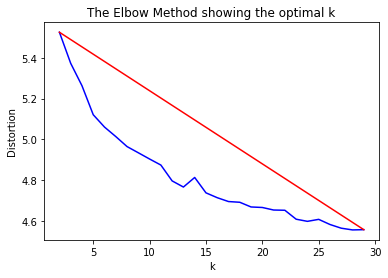

In [20]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

#choose optimal number of clusters
k = 15
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
data['y']= y_pred
centers = np.array(kmeans.cluster_centers_)

## TSNE

In [22]:
#save SBERT
#https://www.kaggle.com/code/maksimeren/covid-19-literature-clustering
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=50,random_state=1099)  # Changed perplexity from 100 to 50  
X_embedded = tsne.fit_transform(encoded_data)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3119 samples in 0.003s...
[t-SNE] Computed neighbors for 3119 samples in 0.507s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3119
[t-SNE] Computed conditional probabilities for sample 2000 / 3119
[t-SNE] Computed conditional probabilities for sample 3000 / 3119
[t-SNE] Computed conditional probabilities for sample 3119 / 3119
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.308212
[t-SNE] KL divergence after 1000 iterations: 1.400443


# Plot graphs

## Plot TSNE

<ipython-input-23-66b038e16c55>:12: UserWarning: The palette list has more values (20) than needed (15), which may not be intended.
  sns.scatterplot(df,x='x',y='y',hue=y_pred,legend='full', palette=palette)


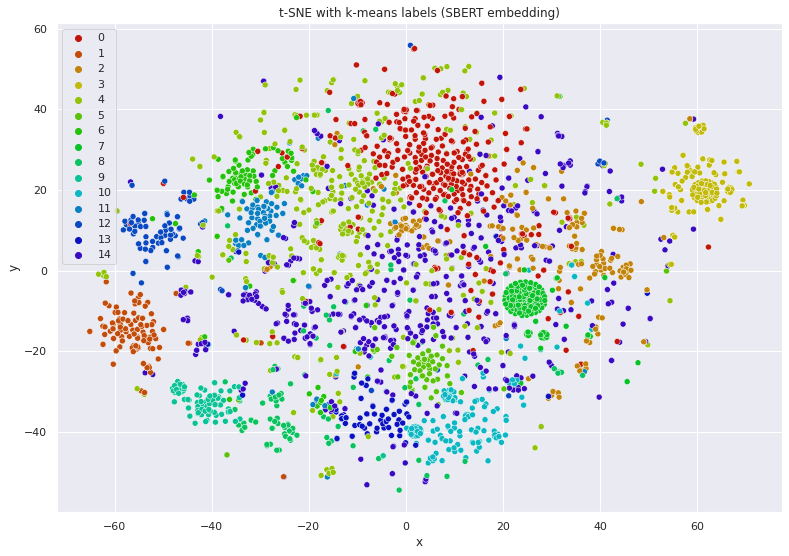

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
df = pd.DataFrame(X_embedded, columns = ['x','y'])
sns.scatterplot(df,x='x',y='y',hue=y_pred,legend='full', palette=palette)
plt.title('t-SNE with k-means labels (SBERT embedding)')
#plt.savefig("t-sne_agpal.png")
plt.show()

## Culmulative frequency for all tags

In [24]:
df1= pd.DataFrame(data['topic'].value_counts())#.plot.pie(rotatelabels=False,autopct='%1.0f%%',pctdistance=0.6, labeldistance=0.7)
df1['CumulativePercent'] = 100*(df1.topic.cumsum() / df1.topic.sum())
num_post_categories = df1.shape[0]
print(f"There are {num_post_categories} unique tags for all agpal posts.")
df1

There are 34 unique tags for all agpal posts.


topic  CumulativePercent
ExpertiseAdviceGuidance                  1099          35.235652
FinancingCreditIncomeStability            362          46.841937
CropProduction                            275          55.658865
DataMapsTools                             153          60.564283
PestManagement                            133          64.828471
RegulationsEnforcement                    115          68.515550
LandPurchaseLeasingAccess                 102          71.785829
LeadershipTrainingWorkforceDevelopment     97          74.895800
LaboratoryVeterinaryServices               78          77.396601
ProductDevelopmentCommercialization        56          79.192049
PromotionalEventsSupport                   55          80.955434
BasicAppliedResearch                       51          82.590574
FoodSafetyTraceabilityBiosecurity          50          84.193652
ClimateChangeResilience                    45          85.636422
FarmingMethodsPractices                    42          86.983007
EnergySustainabilityBMPs                   41          88.297531
InsuranceRecoveryAid                       40          89.579994
SectorCompetitivenessAdaptation            40          90.862456
BusinessPlanningAnalysis                   39          92.112857
AnimalHealthWelfareGenetics                33          93.170888
EquipmentMachineryProcessing               31          94.164796
WaterSoilShelterbelts                      25          94.966335
LicensingCertificationLegalIssues          25          95.767874
GeographyOptimizingLandUse                 24          96.537352
CommunityRuralDevelopment                  18          97.114460
HiringManagingWorkers                      17          97.659506
NewToFarming                               16          98.172491
MarketAnalysisPricesForecasts              15          98.653415
FindingSuppliersBuyers                     15          99.134338
MentalHealthWellness                       11          99.487015
DevelopingNewMarketsExporting               6          99.679384
OrganicGreenhouseFarming                    6          99.871754
PredatorsWildlife                           2          99.935877
ProductBrandingAdvertising                  2         100.000000

## Plot distribution of tags for each cluster

In [25]:
f = plt.figure()
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages(r'tagsByClusters.pdf') as export_pdf:
  for cluster_index in sorted(data['y'].unique()):
    cluster_data = data[data["y"] == cluster_index]['topic']
    num_rows = cluster_data.shape[0]
    top_topics = cluster_data.value_counts().head(5)
    capture_rate = sum(top_topics.to_frame().reset_index()["topic"])/num_rows
    plot_title = "Cluster " + str(cluster_index)+": "+f' the top 5 topics account for {capture_rate:.0%} percent of all posts in the cluster'
    top_topics.plot.pie(rotatelabels=False,autopct='%1.0f%%',pctdistance=0.6, labeldistance=0.7)
    plt.xlabel(plot_title, rotation=0)
    # print("--------------------------------------------------------------------------\n")
    # plt.show()
    export_pdf.savefig()
    plt.close()
  f.savefig("tags per cluster.pdf", bbox_inches='tight')

# API for AgPal

In [ ]:
params = {'lang': 'EN', 'format': 'json',"keyword":"quebec stuff","pagesize":10,"page":1}
url = "http://api.agpaldataservice.ca/AgPalDataAPI/api/v2/query"
url2 = "https://agpal.ca/en/search-agpal"
response=requests.get(url, params=params)

In [ ]:
# https://curlconverter.com/
# https://www.convertcsv.com/json-to-csv.htm
import requests

headers = {
    'authority': 'prodapi.agpal.ca',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'en-US,en;q=0.9,zh-TW;q=0.8,zh;q=0.7',
    'content-type': 'multipart/form-data; boundary=----WebKitFormBoundarybyu7xBgCXVoSYsl8',
    'origin': 'https://agpal.ca',
    'referer': 'https://agpal.ca/',
    'sec-ch-ua': '"Not?A_Brand";v="8", "Chromium";v="108", "Microsoft Edge";v="108"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36 Edg/108.0.1462.42',
}

data = '------WebKitFormBoundarybyu7xBgCXVoSYsl8\r\nContent-Disposition: form-data; name="queryaction"\r\n\r\nfieldquery\r\n------WebKitFormBoundarybyu7xBgCXVoSYsl8\r\nContent-Disposition: form-data; name="fq"\r\n\r\nkeyword:{toronto}\r\n------WebKitFormBoundarybyu7xBgCXVoSYsl8\r\nContent-Disposition: form-data; name="lang"\r\n\r\nen\r\n------WebKitFormBoundarybyu7xBgCXVoSYsl8\r\nContent-Disposition: form-data; name="pageSize"\r\n\r\n25\r\n------WebKitFormBoundarybyu7xBgCXVoSYsl8\r\nContent-Disposition: form-data; name="sort"\r\n\r\nscore:desc\r\n------WebKitFormBoundarybyu7xBgCXVoSYsl8\r\nContent-Disposition: form-data; name="sort"\r\n\r\nsort2:asc\r\n------WebKitFormBoundarybyu7xBgCXVoSYsl8--\r\n'

response = requests.post('https://prodapi.agpal.ca/api/v1/search', headers=headers, data=data)
response.text

'{"count":"27","docs":[{"ID":"ASSN-10177-en","shortDesc":"\\n         <p>Promotes a collaborative approach to Canadian animal health.</p>\\n      ","title":"Canadian Animal Health Coalition","url":"\\n         <a target=\\"_blank\\" href=\\"https://animalhealth.ca/\\">Canadian Animal Health Coalition</a>\\n      ","authority":"Other","programOwner":"ASSN","policyFramework":"NotApplicable","releaseStatus":"live","programOwnerNotes":"","rank":"18175.977","category":"Service","region":["AcrossCanada"],"topic":["AnimalHealthWelfareGenetics","ExpertiseAdviceGuidance"],"service":["ExpertiseAdviceGuidance"],"commodity":["PoultryEggs","Livestock"],"clientType":["AgribusinessesFoodProcessors","IndustryAssociationsFarmingOrganizations","FarmersFoodProducers","Veterinarians","EquineBusinesses"],"keywords":["on n0m 1t0 grand bend box 1314 info@animalhealth.ca 519.835.2233 canadian carl block award cahc 2013 novemb 26, 2019 agm, ottawa 2013 12:00 pm edt novemb 26, 2019 octob 23, 2019 toronto 19, 20

In [ ]:
import requests

cookies = {
    'visid_incap_2269415': 'qxLOSaZ6Shqe0TQvFj2OK0/KjmMAAAAAQUIPAAAAAACMP5xXb6J2MevqZKGBXQ1H',
    'nlbi_2269415': 'gNVMHDV3cn1iABDYzBLR3QAAAAC6E9kQPw2K9B5qXQrNyvc5',
    'incap_ses_674_2269415': 'yRbyH87CeA65otwRRIhaCVDKjmMAAAAAHz1EgifEf/xyN90x0WX9XA==',
    'reese84': '3:hNK4DVcvfopUMKFF+59dYw==:HckW2RwNAYCtg94XYRRfxLZ167RXNW/MYgi6TpIPNCKOlt3KcYDra/0oU5YJjdlT/5BGadfhhTHKYw4pw8LzmIu/0UYMn5On12kSMAB78EhtNmdekwIUZs5cO2Kt6pz01U59IYwlD1Al9J2N4BwNmYK0OAaCrVoXU/9OOimehxyyHMMfaRZJJq4x25KPSpG2UhL3Untq2QjJFEZlktLjYyEhpHjkMxH88/2AorFhWwiaW0JFeB6Tywiwx0jgJtiBvp4TrIN+W9JHjHmEq8U7lVOlJyidgtjXjqtbazRuy5UdorrfbmOepssj2sbtU2QNuhvvrggRMLAIKY+plIj0HUTlAOKeXrG9D9e7RWERmJMGmlOV9KrfzJTKlOxGLXK1hGuiW5LWKnSArVJeFodZxw+dgKq4U+TOdMET5eo5lxAgN8ej1ZZJxM7i6pfH6Q18/ogiiffeazBwusya9q822A==:OzBrhj6/QyGrej87w5OrfQMV9OSnmhQF6yxSGiv9xNI=',
    'gig_bootstrap_3_mrQiIl6ov44s2X3j6NGWVZ9SDDtplqV7WgdcyEpGYnYxl7ygDWPQHqQqtpSiUfko': 'gigya-pr_ver4',
    'ASP.NET_SessionId': 'oypqnqdplwlv30e1fcjkjeqi',
    'visid_incap_2271082': 'wSUcntjMQ/qqeKjPgooVmljKjmMAAAAAQUIPAAAAAABnJXWAWosbcgIP38noPGby',
    'nlbi_2271082': 'ijZpUZzCsRKAzXTcVPrQ3QAAAAAp+aG/k5zGtSruGY3nkybj',
    'incap_ses_674_2271082': 'ZNGxQMmeNTDDptwRRIhaCVrKjmMAAAAArOI9oBEeNWNl2vNNlcKstw==',
    'nlbi_2269415_2147483392': 'QDHjLQS88QJ1HQOLzBLR3QAAAABJVrq/cD7Vkja1W136cfS4',
}

headers = {
    'authority': 'api2.realtor.ca',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9,zh-TW;q=0.8,zh;q=0.7',
    'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
    # 'cookie': 'visid_incap_2269415=qxLOSaZ6Shqe0TQvFj2OK0/KjmMAAAAAQUIPAAAAAACMP5xXb6J2MevqZKGBXQ1H; nlbi_2269415=gNVMHDV3cn1iABDYzBLR3QAAAAC6E9kQPw2K9B5qXQrNyvc5; incap_ses_674_2269415=yRbyH87CeA65otwRRIhaCVDKjmMAAAAAHz1EgifEf/xyN90x0WX9XA==; reese84=3:hNK4DVcvfopUMKFF+59dYw==:HckW2RwNAYCtg94XYRRfxLZ167RXNW/MYgi6TpIPNCKOlt3KcYDra/0oU5YJjdlT/5BGadfhhTHKYw4pw8LzmIu/0UYMn5On12kSMAB78EhtNmdekwIUZs5cO2Kt6pz01U59IYwlD1Al9J2N4BwNmYK0OAaCrVoXU/9OOimehxyyHMMfaRZJJq4x25KPSpG2UhL3Untq2QjJFEZlktLjYyEhpHjkMxH88/2AorFhWwiaW0JFeB6Tywiwx0jgJtiBvp4TrIN+W9JHjHmEq8U7lVOlJyidgtjXjqtbazRuy5UdorrfbmOepssj2sbtU2QNuhvvrggRMLAIKY+plIj0HUTlAOKeXrG9D9e7RWERmJMGmlOV9KrfzJTKlOxGLXK1hGuiW5LWKnSArVJeFodZxw+dgKq4U+TOdMET5eo5lxAgN8ej1ZZJxM7i6pfH6Q18/ogiiffeazBwusya9q822A==:OzBrhj6/QyGrej87w5OrfQMV9OSnmhQF6yxSGiv9xNI=; gig_bootstrap_3_mrQiIl6ov44s2X3j6NGWVZ9SDDtplqV7WgdcyEpGYnYxl7ygDWPQHqQqtpSiUfko=gigya-pr_ver4; ASP.NET_SessionId=oypqnqdplwlv30e1fcjkjeqi; visid_incap_2271082=wSUcntjMQ/qqeKjPgooVmljKjmMAAAAAQUIPAAAAAABnJXWAWosbcgIP38noPGby; nlbi_2271082=ijZpUZzCsRKAzXTcVPrQ3QAAAAAp+aG/k5zGtSruGY3nkybj; incap_ses_674_2271082=ZNGxQMmeNTDDptwRRIhaCVrKjmMAAAAArOI9oBEeNWNl2vNNlcKstw==; nlbi_2269415_2147483392=QDHjLQS88QJ1HQOLzBLR3QAAAABJVrq/cD7Vkja1W136cfS4',
    'origin': 'https://www.realtor.ca',
    'referer': 'https://www.realtor.ca/',
    'sec-ch-ua': '"Not?A_Brand";v="8", "Chromium";v="108", "Microsoft Edge";v="108"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36 Edg/108.0.1462.42',
}

data = {
    'LatitudeMax': '45.59912',
    'LongitudeMax': '-75.34509',
    'LatitudeMin': '45.37187',
    'LongitudeMin': '-75.90876',
    'Sort': '6-D',
    'PropertyTypeGroupID': '1',
    'PropertySearchTypeId': '1',
    'TransactionTypeId': '2',
    'Currency': 'CAD',
    'RecordsPerPage': '12',
    'ApplicationId': '1',
    'CultureId': '1',
    'Version': '7.0',
    'CurrentPage': '1',
}

response2 = requests.post('https://api2.realtor.ca/Listing.svc/PropertySearch_Post', cookies=cookies, headers=headers, data=data)
response2.text

'{"ErrorCode":{"Id":200,"Description":"Success - OK","Status":"Pins-Via-Cache:false;Sidebar-Items-Via-Cache:0;","ProductName":"Realtor API 7 | 20221109.3 | 660facef3b43c5755e5e5919321dc8bda7be3159 | Wednesday, November 9, 2022 10:42:45 AM","Version":"1.0.8348.28292"},"Paging":{"RecordsPerPage":12,"CurrentPage":1,"TotalRecords":2054,"MaxRecords":600,"TotalPages":50,"RecordsShowing":600,"Pins":950},"Results":[{"Id":"25118125","MlsNumber":"23738537","PublicRemarks":"Directly on the Plateau, this superb 2019 construction is offering you 3 bedrooms upstairs, 2 bathrooms and a powder room, kitchen with thermoplastic cabinets and a large family room. Close to all services, it awaits you! (48856662)","Building":{"BathroomTotal":"1","Bedrooms":"3","StoriesTotal":"2","Type":"House"},"Individual":[{"IndividualID":2093839,"Name":"Souleymane Haydara","Organization":{"OrganizationID":57109,"Name":"RE\\/MAX DIRECT INC.","Logo":"https:\\/\\/cdn.realtor.ca\\/organization\\/en-CA\\/TS638058681320000000\

# Download files

In [ ]:
df1.to_csv('df1.csv') 
from google.colab import files
files.download("df1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# make an example object to pickle
with open('X_embedded_desc_new.p', 'wb') as f:
    pickle.dump(X_embedded, f)